In [759]:
import pandas as pd
import numpy as np
import seaborn as sn

In [760]:
df = pd.read_csv('WA_Fn-useC_-HR-Employee-Attrition.csv')
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In this data set Attrition is the target and all other columns are input varaibles. Output has only 0 and 1 we can solve by LogisticRegression.

In [761]:
#get the nomber of rows and columns
df.shape

(1470, 35)

There are 1470 rows and 35 columns.

In [762]:
#Get the column data types
df.dtypes

Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears   

In [763]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [764]:
# Get a count of the empty values for each column
df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

There is no missing values.

In [765]:
#Check for nay missing/null values in the data
df.isnull().values.any()

False

In [766]:
# view some statistics
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


Std is more in DailyRate, EmployeeNumber means data spreads too much.
In some variable mean is greater then median, skewness are present in those vaiables.
some ouliers are present.

minimum employe age is 18 and maximum is 60.

In [767]:
df['Attrition'].value_counts()

No     1233
Yes     237
Name: Attrition, dtype: int64

1233 employees stayed with the company and 229 employess left the company

<AxesSubplot:xlabel='Attrition', ylabel='count'>

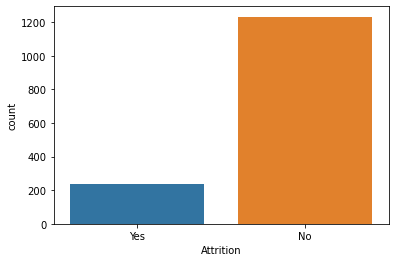

In [768]:
#Visualize the number of employees that stayed and left the company
sn.countplot(df['Attrition'])

<AxesSubplot:xlabel='Age', ylabel='count'>

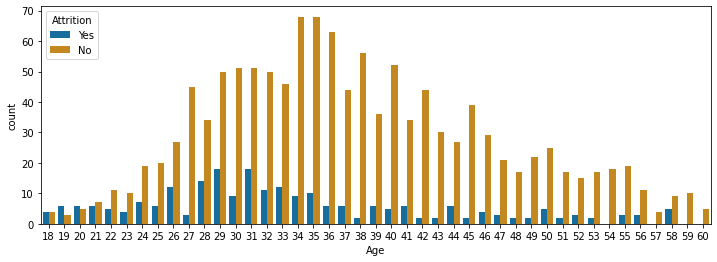

In [769]:
#Show the number of employees thata left and stayed by age
import matplotlib.pyplot as plt
plt.subplots(figsize=(12,4))
sn.countplot(x='Age',hue='Attrition', data=df,palette='colorblind')

Between age 24-31 left job but between age 34-38 employee stayed in the company.

In [770]:
#Print all of the data types and their unique value
for column in df.columns:
    if df[column].dtype == object:
        print(str(column) + ' :'+ str(df[column].unique()))
        print(df[column].value_counts())
        print('------------------------')

Attrition :['Yes' 'No']
No     1233
Yes     237
Name: Attrition, dtype: int64
------------------------
BusinessTravel :['Travel_Rarely' 'Travel_Frequently' 'Non-Travel']
Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: BusinessTravel, dtype: int64
------------------------
Department :['Sales' 'Research & Development' 'Human Resources']
Research & Development    961
Sales                     446
Human Resources            63
Name: Department, dtype: int64
------------------------
EducationField :['Life Sciences' 'Other' 'Medical' 'Marketing' 'Technical Degree'
 'Human Resources']
Life Sciences       606
Medical             464
Marketing           159
Technical Degree    132
Other                82
Human Resources      27
Name: EducationField, dtype: int64
------------------------
Gender :['Female' 'Male']
Male      882
Female    588
Name: Gender, dtype: int64
------------------------
JobRole :['Sales Executive' 'Research Scientist' 'Laboratory Technici

In [771]:
df['StandardHours'].unique()

array([80], dtype=int64)

In [772]:
df['EmployeeCount'].unique()

array([1], dtype=int64)

In [773]:
#Remove some columns
df= df.drop('Over18',axis=1)
df = df.drop('EmployeeNumber',axis=1)
df = df.drop('StandardHours',axis=1)
df = df.drop('EmployeeCount',axis=1)

All the empoyees are above 18 no need of column over18 we can drop it.
EmployeeNumber is a number which will not affect the Attrition so we can drop it.
StandardHours is same for everyone so we can drop it too.
EmployeeCount is also same for everyone so we can drop it too.

In [774]:
le= LabelEncoder()
df= df.apply(LabelEncoder().fit_transform)
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,23,1,2,624,2,0,1,1,1,0,...,0,0,0,8,0,0,6,4,0,5
1,31,0,1,113,1,7,0,1,2,1,...,1,3,1,10,3,2,10,7,1,7
2,19,1,2,805,1,1,1,4,3,1,...,0,1,0,7,3,2,0,0,0,0
3,15,0,1,820,1,2,3,1,3,0,...,0,2,0,8,3,2,8,7,3,0
4,9,0,2,312,1,1,0,3,0,1,...,0,3,1,6,3,2,2,2,2,2


In [775]:
#Get the correlation
cor=df.corr()
cor

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
Age,1.000000,-0.159205,0.024751,0.010557,-0.031882,-0.001686,0.208034,-0.040873,0.010146,-0.036311,...,0.001904,0.053535,0.037510,0.680409,-0.019621,-0.021490,0.309796,0.212901,0.216513,0.202089
Attrition,-0.159205,1.000000,0.000074,-0.056605,0.063991,0.077924,-0.031373,0.026846,-0.103369,0.029453,...,0.002889,-0.045872,-0.137145,-0.171571,-0.059478,-0.063939,-0.136932,-0.160545,-0.033019,-0.156199
BusinessTravel,0.024751,0.000074,1.000000,-0.004103,-0.009044,-0.024469,0.000757,0.023724,0.004174,-0.032981,...,-0.026341,-0.035986,-0.016727,0.034144,0.015240,-0.011256,-0.014720,-0.011497,-0.032591,-0.022636
DailyRate,0.010557,-0.056605,-0.004103,1.000000,0.007796,-0.004738,-0.016550,0.038129,0.018462,-0.011194,...,0.000633,0.008530,0.041786,0.014877,0.002227,-0.037791,-0.032461,0.010997,-0.033431,-0.025849
Department,-0.031882,0.063991,-0.009044,0.007796,1.000000,0.017225,0.007996,0.013720,-0.019395,-0.041583,...,-0.024604,-0.022414,-0.012193,-0.015685,0.036875,0.026383,0.023308,0.056315,0.040061,0.034282
DistanceFromHome,-0.001686,0.077924,-0.024469,-0.004738,0.017225,1.000000,0.021042,0.002013,-0.016075,-0.001851,...,0.027110,0.006557,0.044872,0.004560,-0.036942,-0.026556,0.009038,0.018845,0.010029,0.014406
Education,0.208034,-0.031373,0.000757,-0.016550,0.007996,0.021042,1.000000,-0.039592,-0.027128,-0.016547,...,-0.024539,-0.009118,0.018422,0.148188,-0.025100,0.009819,0.067737,0.060236,0.054254,0.069065
EducationField,-0.040873,0.026846,0.023724,0.038129,0.013720,0.002013,-0.039592,1.000000,0.043163,-0.002504,...,-0.005614,-0.004378,-0.016185,-0.027833,0.049195,0.041191,-0.018987,-0.010506,0.002326,-0.004130
EnvironmentSatisfaction,0.010146,-0.103369,0.004174,0.018462,-0.019395,-0.016075,-0.027128,0.043163,1.000000,0.000508,...,-0.029548,0.007665,0.003432,-0.002900,-0.019359,0.027627,0.000657,0.018007,0.016194,-0.004999
Gender,-0.036311,0.029453,-0.032981,-0.011194,-0.041583,-0.001851,-0.016547,-0.002504,0.000508,1.000000,...,-0.013859,0.022868,0.012716,-0.046875,-0.038787,-0.002753,-0.030797,-0.041483,-0.026985,-0.030599


<AxesSubplot:>

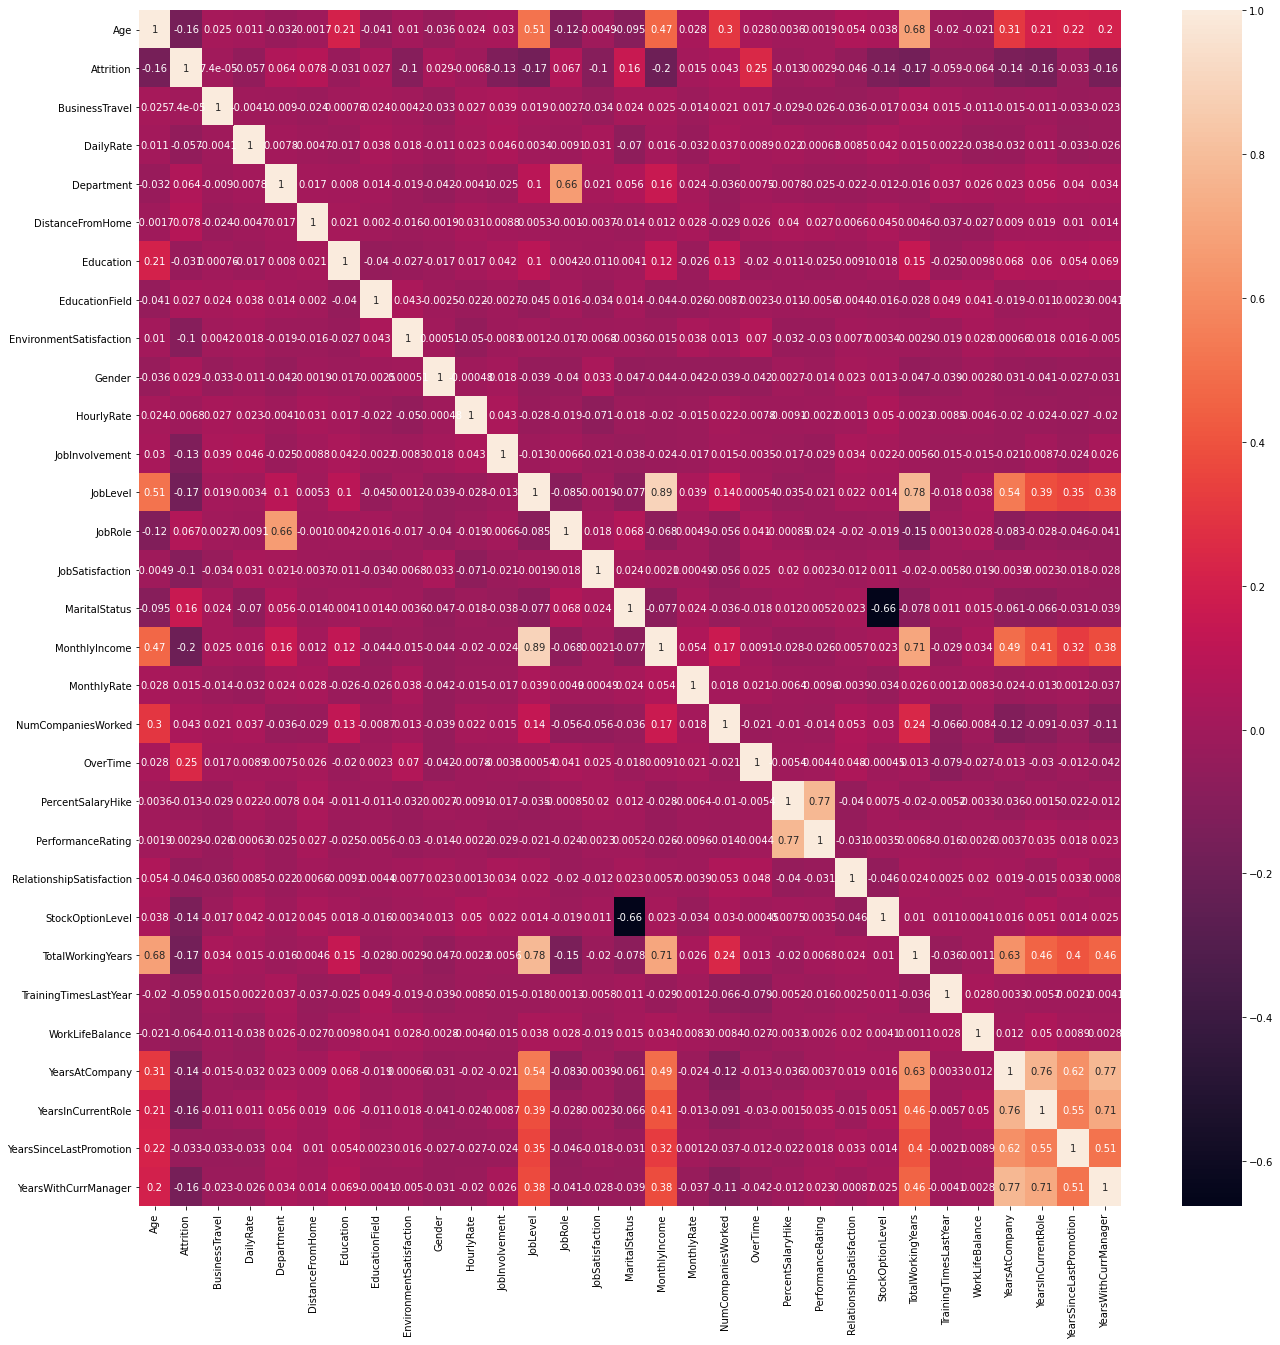

In [776]:
plt.figure(figsize=(22,22))
sn.heatmap(cor,annot=True)

In [777]:
#Transform the data
#Transform non-numerical into numerical columns
from sklearn.preprocessing import LabelEncoder

import warnings
warnings.filterwarnings('ignore')

le= LabelEncoder()
df = df.apply(LabelEncoder().fit_transform)

In [778]:
#Create a new column
df['Age_Years']=df['Age']

In [779]:
#Drop the age column
df = df.drop('Age',axis = 1)

In [780]:
#Show our Dataframe
df.head()

,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,...,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Age_Years
0,1,2,624,2,0,1,1,1,0,64,...,0,0,8,0,0,6,4,0,5,23
1,0,1,113,1,7,0,1,2,1,31,...,3,1,10,3,2,10,7,1,7,31
2,1,2,805,1,1,1,4,3,1,62,...,1,0,7,3,2,0,0,0,0,19
3,0,1,820,1,2,3,1,3,0,26,...,2,0,8,3,2,8,7,3,0,15
4,0,2,312,1,1,0,3,0,1,10,...,3,1,6,3,2,2,2,2,2,9


Attrition                       AxesSubplot(0.125,0.71587;0.0824468x0.16413)
BusinessTravel               AxesSubplot(0.223936,0.71587;0.0824468x0.16413)
DailyRate                    AxesSubplot(0.322872,0.71587;0.0824468x0.16413)
Department                   AxesSubplot(0.421809,0.71587;0.0824468x0.16413)
DistanceFromHome             AxesSubplot(0.520745,0.71587;0.0824468x0.16413)
Education                    AxesSubplot(0.619681,0.71587;0.0824468x0.16413)
EducationField               AxesSubplot(0.718617,0.71587;0.0824468x0.16413)
EnvironmentSatisfaction      AxesSubplot(0.817553,0.71587;0.0824468x0.16413)
Gender                         AxesSubplot(0.125,0.518913;0.0824468x0.16413)
HourlyRate                  AxesSubplot(0.223936,0.518913;0.0824468x0.16413)
JobInvolvement              AxesSubplot(0.322872,0.518913;0.0824468x0.16413)
JobLevel                    AxesSubplot(0.421809,0.518913;0.0824468x0.16413)
JobRole                     AxesSubplot(0.520745,0.518913;0.0824468x0.16413)

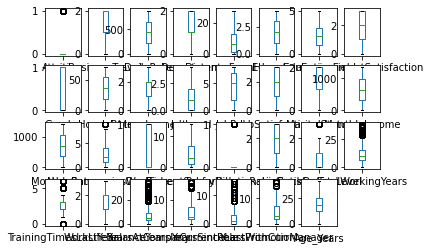

In [781]:
df.plot(kind='box',subplots=True,layout=(4,8))

In [782]:
#Removing Outliers
from scipy.stats import zscore

z=np.abs(zscore(df))

new_df=df [(z<3).all(axis=1)]

In [783]:
new_df.shape

(1387, 31)

In [784]:
df.shape

(1470, 31)

In [785]:
df=new_df

In [786]:
df.shape

(1387, 31)

In [787]:
df.skew()

Attrition                   1.805983
BusinessTravel             -1.426774
DailyRate                  -0.012403
Department                  0.183919
DistanceFromHome            0.954752
Education                  -0.289024
EducationField              0.544868
EnvironmentSatisfaction    -0.325285
Gender                     -0.417296
HourlyRate                 -0.030481
JobInvolvement             -0.501401
JobLevel                    1.126075
JobRole                    -0.386843
JobSatisfaction            -0.345612
MaritalStatus              -0.160952
MonthlyIncome               0.112326
MonthlyRate                 0.024344
NumCompaniesWorked          1.037715
OverTime                    0.954751
PercentSalaryHike           0.800592
PerformanceRating           1.931566
RelationshipSatisfaction   -0.295686
StockOptionLevel            0.962332
TotalWorkingYears           1.034487
TrainingTimesLastYear       0.577614
WorkLifeBalance            -0.557100
YearsAtCompany              1.248623
Y

<AxesSubplot:ylabel='Frequency'>

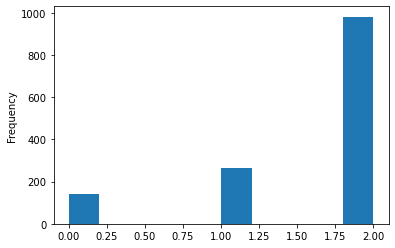

In [788]:
df['BusinessTravel'].plot.hist()

In [789]:
#df['BusinessTravel']=np.log(df['BusinessTravel'])

<AxesSubplot:ylabel='Frequency'>

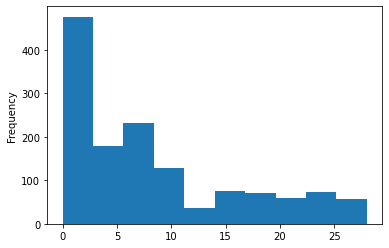

In [790]:
df['DistanceFromHome'].plot.hist()

In [791]:
#df['DistanceFromHome']=np.log(df['DistanceFromHome'])

<AxesSubplot:ylabel='Frequency'>

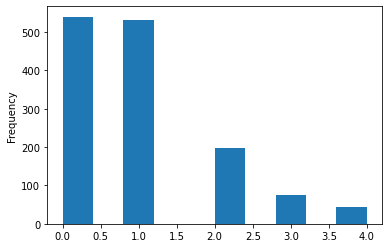

In [792]:
df['JobLevel'].plot.hist()

In [793]:
#df['JobLevel']=np.log(df['JobLevel'])

<AxesSubplot:ylabel='Frequency'>

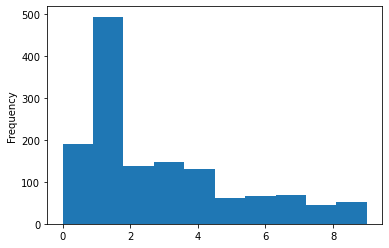

In [794]:
df['NumCompaniesWorked'].plot.hist()

In [795]:
#df['NumCompaniesWorked']=np.log(df['NumCompaniesWorked'])

<AxesSubplot:ylabel='Frequency'>

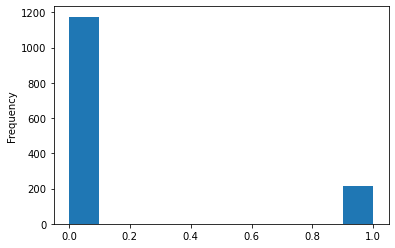

In [796]:
df['PerformanceRating'].plot.hist()

In [797]:
#df['PerformanceRating']=np.log(df['PerformanceRating'])

<AxesSubplot:ylabel='Frequency'>

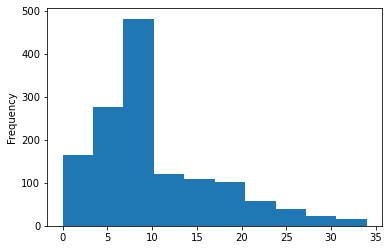

In [798]:
df['TotalWorkingYears'].plot.hist()

In [799]:
#df['TotalWorkingYears']=np.log(df['TotalWorkingYears'])

<AxesSubplot:ylabel='Frequency'>

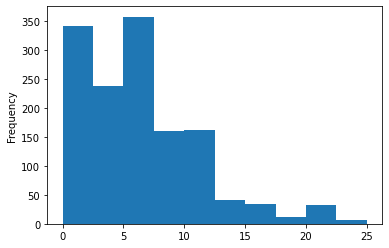

In [800]:
df['YearsAtCompany'].plot.hist()

In [801]:
#df['YearsAtCompany']=np.log(df['YearsAtCompany'])

<AxesSubplot:ylabel='Frequency'>

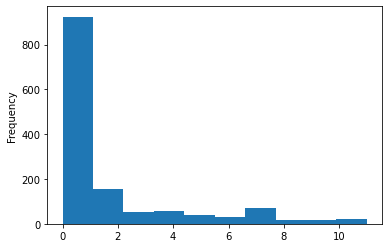

In [802]:
df['YearsSinceLastPromotion'].plot.hist()

In [803]:
#df['YearsSinceLastPromotion']=np.log(df['YearsSinceLastPromotion'])

In [804]:
#Split the data
x =df.drop(['Attrition'],axis=1)
y= df['Attrition']

In [805]:
x.head()

,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,...,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Age_Years
0,2,624,2,0,1,1,1,0,64,2,...,0,0,8,0,0,6,4,0,5,23
1,1,113,1,7,0,1,2,1,31,1,...,3,1,10,3,2,10,7,1,7,31
2,2,805,1,1,1,4,3,1,62,1,...,1,0,7,3,2,0,0,0,0,19
3,1,820,1,2,3,1,3,0,26,2,...,2,0,8,3,2,8,7,3,0,15
4,2,312,1,1,0,3,0,1,10,2,...,3,1,6,3,2,2,2,2,2,9


In [806]:
y.head()

0    1
1    0
2    1
3    0
4    0
Name: Attrition, dtype: int64

In [807]:
#Split the data into 75% training and 25% testing
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.25,random_state=42)

In [808]:
x_train.shape

(1040, 30)

In [809]:
x_test.shape

(347, 30)

In [810]:
y_train.shape

(1040,)

In [811]:
y_test.shape

(347,)

In [812]:
from sklearn.linear_model import LogisticRegression
lg=LogisticRegression()
lg.fit(x_train,y_train)

LogisticRegression()

In [813]:
pred=lg.predict(x_test)
print(pred)

[0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 1 0 0 0 0 0 0 0 0 0 0]


In [814]:
print('accuracy_score:',accuracy_score(y_test,pred))

accuracy_score: 0.8242074927953891


In [815]:
from sklearn.metrics import confusion_matrix,classification_report
print(confusion_matrix(y_test,pred))

[[277   5]
 [ 56   9]]


In [816]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.83      0.98      0.90       282
           1       0.64      0.14      0.23        65

    accuracy                           0.82       347
   macro avg       0.74      0.56      0.56       347
weighted avg       0.80      0.82      0.77       347



In [817]:
print(cross_val_score(lg,x,y,cv=5).mean())

0.8370646443134302


In [818]:
#Use the Random Forest Classifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score

RFC = RandomForestClassifier()
RFC.fit(x_train,y_train)
pred = RFC.predict(x_test)
acc=classification_report(y_test,pred)
print(acc)

print(cross_val_score(rf,x,y,cv=5).mean())

              precision    recall  f1-score   support

           0       0.83      0.99      0.90       282
           1       0.75      0.14      0.23        65

    accuracy                           0.83       347
   macro avg       0.79      0.56      0.57       347
weighted avg       0.82      0.83      0.78       347

0.8493130405422955


In [819]:
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeClassifier(random_state =0, max_depth =5)
dt.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=5, random_state=0)

In [820]:
dt.score(x_train,y_train)

0.9096153846153846

In [821]:
predictions = dt.predict(x_test)

In [822]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,predictions)

0.8155619596541787

In [823]:
print(cross_val_score(dt,x,y,cv=5).mean())

0.8219021894397839


In [824]:
from sklearn.svm import SVC
                                    
from sklearn.metrics import classification_report
SV = SVC()
SV.fit(x_train,y_train)
pred = SV.predict(x_test)
acc=classification_report(y_test,pred)
print(acc)

print(cross_val_score(SV,x,y,cv=5).mean())

              precision    recall  f1-score   support

           0       0.81      1.00      0.90       282
           1       0.00      0.00      0.00        65

    accuracy                           0.81       347
   macro avg       0.41      0.50      0.45       347
weighted avg       0.66      0.81      0.73       347

0.8348959821312626


Best algoritham is RandomForest with accuracy is 83%.

In [825]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

from sklearn.metrics import roc_auc_score

In [826]:
y_pred_prob=RFC.predict_proba(x_test)[:,1]

In [827]:
y_pred_prob

array([0.43, 0.06, 0.31, 0.6 , 0.15, 0.24, 0.29, 0.16, 0.16, 0.05, 0.04,
       0.08, 0.63, 0.12, 0.04, 0.25, 0.56, 0.12, 0.25, 0.06, 0.13, 0.2 ,
       0.17, 0.06, 0.37, 0.3 , 0.17, 0.49, 0.13, 0.07, 0.03, 0.19, 0.34,
       0.26, 0.27, 0.11, 0.32, 0.08, 0.09, 0.2 , 0.49, 0.12, 0.35, 0.16,
       0.08, 0.19, 0.21, 0.07, 0.12, 0.17, 0.07, 0.1 , 0.3 , 0.08, 0.02,
       0.28, 0.03, 0.34, 0.24, 0.16, 0.02, 0.12, 0.09, 0.4 , 0.45, 0.08,
       0.15, 0.09, 0.19, 0.22, 0.13, 0.11, 0.42, 0.26, 0.27, 0.1 , 0.21,
       0.04, 0.07, 0.21, 0.13, 0.08, 0.2 , 0.07, 0.13, 0.23, 0.02, 0.37,
       0.05, 0.27, 0.81, 0.31, 0.33, 0.07, 0.1 , 0.13, 0.23, 0.11, 0.15,
       0.12, 0.31, 0.15, 0.05, 0.02, 0.2 , 0.11, 0.05, 0.41, 0.03, 0.14,
       0.21, 0.51, 0.06, 0.06, 0.06, 0.12, 0.07, 0.07, 0.13, 0.03, 0.12,
       0.18, 0.07, 0.58, 0.05, 0.1 , 0.05, 0.32, 0.05, 0.04, 0.1 , 0.22,
       0.19, 0.22, 0.01, 0.25, 0.15, 0.17, 0.1 , 0.02, 0.32, 0.39, 0.07,
       0.09, 0.06, 0.06, 0.25, 0.11, 0.04, 0.07, 0.

In [828]:
fpr,tpr,thresholds=roc_curve(y_test,y_pred_prob)

In [829]:
fpr

array([0.        , 0.        , 0.        , 0.0035461 , 0.0035461 ,
       0.0070922 , 0.0106383 , 0.0106383 , 0.0141844 , 0.0177305 ,
       0.0177305 , 0.0177305 , 0.0177305 , 0.0212766 , 0.0212766 ,
       0.0248227 , 0.03191489, 0.03546099, 0.04255319, 0.04255319,
       0.06028369, 0.07092199, 0.07446809, 0.08510638, 0.09219858,
       0.09574468, 0.10992908, 0.13829787, 0.16666667, 0.17375887,
       0.19148936, 0.21631206, 0.25886525, 0.27304965, 0.29787234,
       0.34397163, 0.36879433, 0.38652482, 0.41843972, 0.47163121,
       0.5070922 , 0.57446809, 0.61702128, 0.67730496, 0.75177305,
       0.81914894, 0.86879433, 0.91489362, 0.94326241, 0.9751773 ,
       0.9929078 , 1.        ])

In [830]:
tpr

array([0.        , 0.01538462, 0.07692308, 0.07692308, 0.09230769,
       0.10769231, 0.10769231, 0.13846154, 0.16923077, 0.16923077,
       0.2       , 0.21538462, 0.24615385, 0.24615385, 0.26153846,
       0.27692308, 0.30769231, 0.30769231, 0.32307692, 0.35384615,
       0.35384615, 0.4       , 0.41538462, 0.43076923, 0.47692308,
       0.50769231, 0.52307692, 0.55384615, 0.55384615, 0.56923077,
       0.63076923, 0.64615385, 0.67692308, 0.69230769, 0.72307692,
       0.73846154, 0.76923077, 0.78461538, 0.81538462, 0.83076923,
       0.84615385, 0.86153846, 0.87692308, 0.89230769, 0.90769231,
       0.93846154, 0.98461538, 1.        , 1.        , 1.        ,
       1.        , 1.        ])

In [831]:
thresholds

array([1.81, 0.81, 0.63, 0.62, 0.6 , 0.59, 0.58, 0.51, 0.49, 0.45, 0.44,
       0.43, 0.42, 0.41, 0.4 , 0.39, 0.37, 0.35, 0.34, 0.33, 0.32, 0.31,
       0.3 , 0.29, 0.28, 0.27, 0.26, 0.25, 0.24, 0.23, 0.22, 0.21, 0.19,
       0.18, 0.17, 0.16, 0.15, 0.14, 0.13, 0.12, 0.11, 0.1 , 0.09, 0.08,
       0.07, 0.06, 0.05, 0.04, 0.03, 0.02, 0.01, 0.  ])

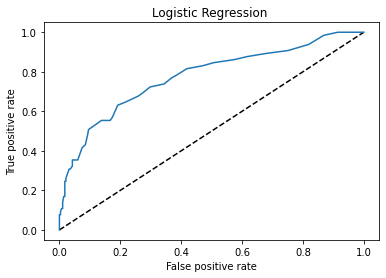

In [832]:
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='Logistic Regression')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('Logistic Regression ')
plt.show()

In [833]:
auc_score=roc_auc_score(y_test,lg.predict(x_test))

In [834]:
print(auc_score)

0.5603655210038189


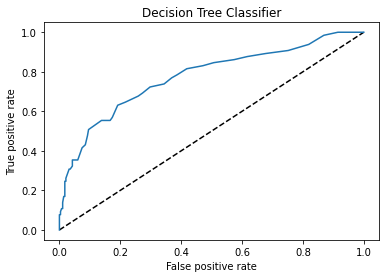

In [835]:
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='Decision Tree Classifier')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('Decision Tree Classifier')
plt.show()

# Hyper Parameter tuning

In [836]:
from sklearn.model_selection import GridSearchCV

In [837]:
parameter ={'max_depth':np.arange(2,10),
           'criterion':['gini','entropy'],
           'splitter':['best','random'],
           'max_features':['auto','sqrt','log2']}

In [838]:
GCV=GridSearchCV(DecisionTreeClassifier(),parameter,cv=5)

In [839]:
GCV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': array([2, 3, 4, 5, 6, 7, 8, 9]),
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'splitter': ['best', 'random']})

In [840]:
GCV.best_params_

{'criterion': 'entropy',
 'max_depth': 3,
 'max_features': 'log2',
 'splitter': 'random'}

In [841]:
import pickle
filename ='HR Analytics.pkl'
pickle.dump(RFC,open(filename,'wb'))

In [843]:
loaded_model = pickle.load(open('HR Analytics.pkl','rb'))
result = loaded_model.score(x_test,y_test)
print(result)

0.829971181556196


The Accuracy is good.